In [4]:
from pathlib import Path
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from ebm.probability import log_distributions, fit_distributions, predict_stage
from ebm.mcmc import greedy_ascent, mcmc, get_optimal_order

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
folder = Path('/data01/bgutman/MRI_data/PPMI/EBM_data/')
data = pd.read_csv(folder / 'corrected_ENIGMA-PD_Mixed_Effects_train_test_split.csv', index_col=0)
train, test = train_test_split(data, stratify=data['cohort'], test_size=0.1, random_state=777)

X_train = train.drop(['SubjID', 'Dx', 'Sex', 'Age', 'cohort'], axis=1).values
y_train = train['Dx'].values
X_test = test.drop(['SubjID', 'Dx', 'Sex', 'Age', 'cohort'], axis=1).values
y_test = test['Dx'].values

train_log_p_e, train_log_p_not_e = log_distributions(X_train, y_train)
test_log_p_e, test_log_p_not_e = log_distributions(X_train, y_train, X_test=X_test, y_test=y_test)

In [5]:
all_orders = np.load('../logs/order_mcmc.npy')

In [6]:
all_orders

array([ 2, 22, 26, 60, 25, 29,  6, 40, 57, 23, 27, 61, 56, 63, 20, 54, 18,
       16, 36, 59, 51,  7, 62, 28, 13, 47, 41,  5,  0, 43,  9, 44, 52, 17,
       11, 46, 50,  3, 15, 32, 34, 39, 66, 37, 67, 49, 45, 10, 30, 12, 64,
       33, 55, 24,  8, 42, 21, 35, 58,  4, 31, 65, 38, 48, 14,  1, 19, 53])

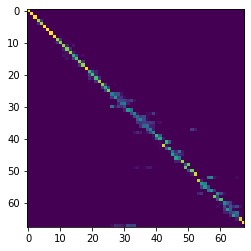

In [90]:
plt.imshow(order_map[best_order]);